#Preprocessing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# for stationary AUF test
from statsmodels.tsa.stattools import adfuller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Direct path to the folder with data
DATA_PATH = "/content/drive/MyDrive/studia/Inżynierka/MAIN/"

In [ ]:
del dataset

## Preparing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/studia/Inżynierka/MAIN/data_ohlcv/DXC_1h.csv', low_memory = False, parse_dates=True)
dataset = dataset.drop(index=0)
dataset = dataset.drop(index=1)
dataset.reset_index(drop=True,inplace=True)
dataset.rename(columns = {'Unnamed: 0':'Datetime'}, inplace = True)
dataset['Datetime'] = pd.to_datetime(dataset['Datetime']).dt.tz_localize(None)
dataset = dataset[['Datetime','Close']]
dataset.head()

,Datetime,Close
0,2022-12-12 16:30:00,26.780001
1,2022-12-12 17:30:00,26.840000
2,2022-12-12 18:30:00,26.965000
3,2022-12-12 19:30:00,27.200001
4,2022-12-12 20:30:00,27.299999


In [ ]:
train_size = int(len(dataset) * 0.7)
train_price, test_price = dataset['Close'][:train_size], dataset['Close'][train_size:]
train, test = dataset['Close'][:train_size], dataset['Close'][train_size:]

In [ ]:
dataset.info()
dataset['Close'] = pd.to_numeric(dataset['Close'], errors='coerce')
print('\n Types of dataset: \n',dataset.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  3482 non-null   datetime64[ns]
 1   Close     3482 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.5 KB

 Types of dataset: 
 Datetime    datetime64[ns]
Close              float64
dtype: object


## Cleaning the data

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()

# Check the presence of missing values
print("\nPresence of missing values:")
print(dataset.isnull().any())


Presence of missing values:
Datetime    False
Close       False
dtype: bool


## Close Price change over time


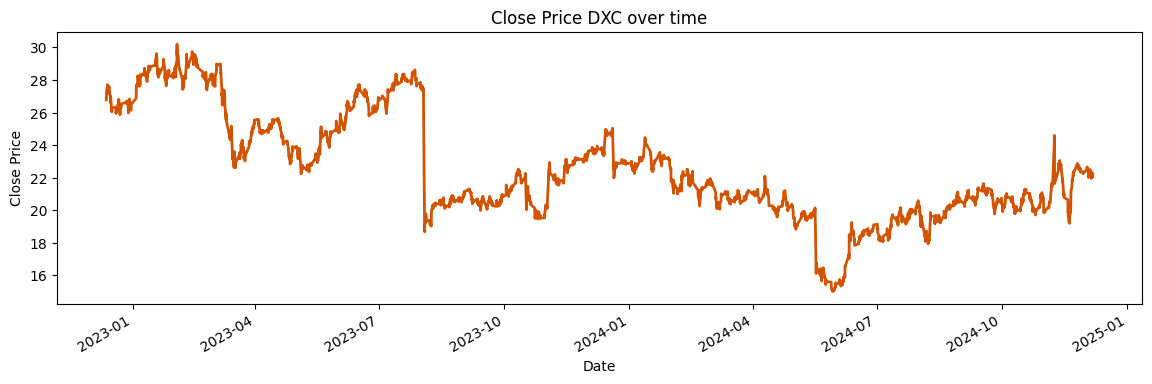

In [ ]:
# Chart of Close Price over time
dataset.set_index('Datetime')['Close'].plot(linewidth=2, figsize=(14, 4), color='#d35400')
plt.title('Close Price DXC over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Defining The Daily Percentage Change

In [ ]:
# Caclulate the Daily Percentage Change in stock price - returns
dataset.loc[:,'Returns'] = (dataset['Close'].pct_change() * 100).round(2)
dataset = dataset.dropna(subset=['Returns'])
dataset

,Datetime,Close,Returns
1,2022-12-12 17:30:00,26.840000,0.22
2,2022-12-12 18:30:00,26.965000,0.47
3,2022-12-12 19:30:00,27.200001,0.87
4,2022-12-12 20:30:00,27.299999,0.37
5,2022-12-13 14:30:00,27.719999,1.54
...,...,...,...
3477,2024-12-06 16:30:00,22.120001,-0.76
3478,2024-12-06 17:30:00,22.070000,-0.23
3479,2024-12-06 18:30:00,22.020000,-0.23
3480,2024-12-06 19:30:00,22.070000,0.23


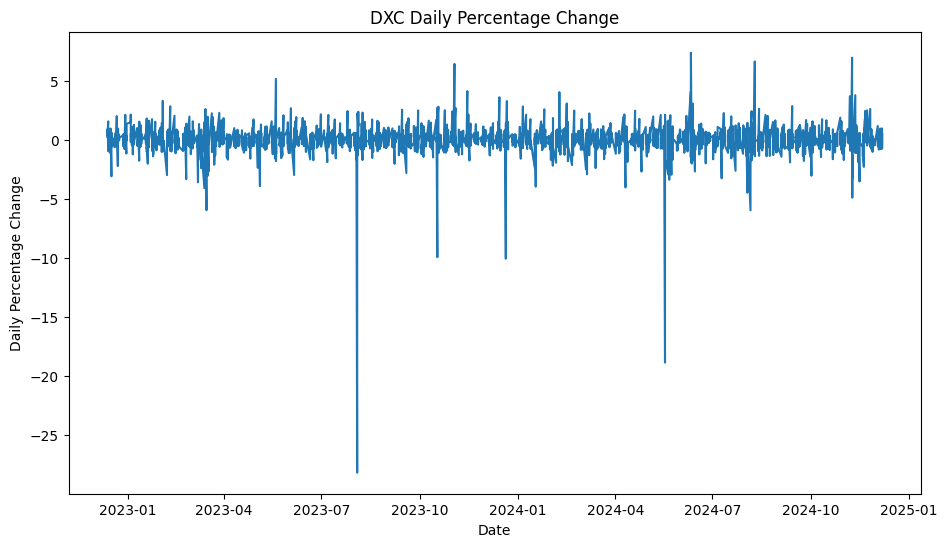

In [ ]:
# Plot Daily Percentage Change
plt.figure(figsize=(11,6))
plt.plot(dataset['Datetime'], dataset['Returns'])
plt.title("DXC Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.show()

## Filtering the selected period of time

In [ ]:
last_date = dataset['Datetime'].max()
last_months_ago = last_date - pd.DateOffset(months=12)
filtered_dataset = dataset[(dataset['Datetime'] >= last_months_ago) & (dataset['Datetime'] <= last_date)]
filtered_dataset = filtered_dataset.reset_index(drop=True)
filtered_dataset

,Datetime,Close,Returns
0,2023-12-06 20:30:00,23.450001,-0.11
1,2023-12-07 14:30:00,23.584999,0.58
2,2023-12-07 15:30:00,23.555000,-0.13
3,2023-12-07 16:30:00,23.549999,-0.02
4,2023-12-07 17:30:00,23.545000,-0.02
...,...,...,...
1752,2024-12-06 16:30:00,22.120001,-0.76
1753,2024-12-06 17:30:00,22.070000,-0.23
1754,2024-12-06 18:30:00,22.020000,-0.23
1755,2024-12-06 19:30:00,22.070000,0.23


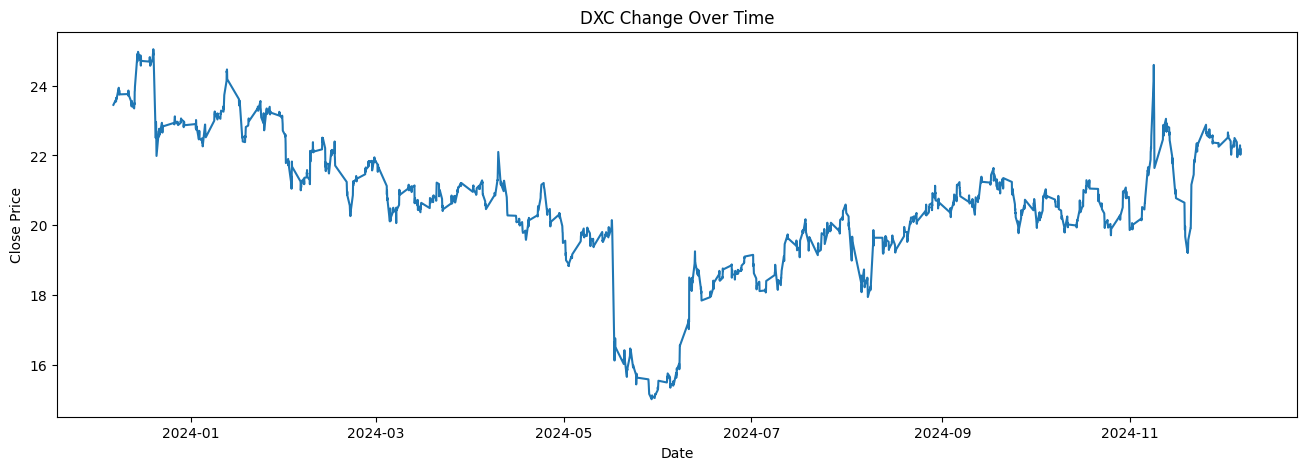

In [ ]:
# Plot the filtered dataset
plt.figure(figsize=(16,5))
plt.plot(filtered_dataset['Datetime'],filtered_dataset['Close'])
plt.title("DXC Change Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [ ]:
filtered_dataset

,Datetime,Close,Returns
0,2023-12-06 20:30:00,23.450001,-0.11
1,2023-12-07 14:30:00,23.584999,0.58
2,2023-12-07 15:30:00,23.555000,-0.13
3,2023-12-07 16:30:00,23.549999,-0.02
4,2023-12-07 17:30:00,23.545000,-0.02
...,...,...,...
1752,2024-12-06 16:30:00,22.120001,-0.76
1753,2024-12-06 17:30:00,22.070000,-0.23
1754,2024-12-06 18:30:00,22.020000,-0.23
1755,2024-12-06 19:30:00,22.070000,0.23


## Saving the dataframe

In [ ]:
dataset.head()

,Datetime,Close,Returns
1,2022-12-12 17:30:00,26.840000,0.22
2,2022-12-12 18:30:00,26.965000,0.47
3,2022-12-12 19:30:00,27.200001,0.87
4,2022-12-12 20:30:00,27.299999,0.37
5,2022-12-13 14:30:00,27.719999,1.54


In [ ]:
dataset.to_csv(DATA_PATH + 'PreparedDataset.csv', index=False)